<a href="https://colab.research.google.com/github/hmkol/Movie-Recommendation-System/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

### Loading the data

In [ ]:
import pandas as pd

movies = pd.read_csv(r"D:\movies.csv")
ratings = pd.read_csv(r"D:\ratings.csv")

In [ ]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


### Handling missing values

In [ ]:
print("Missing values in movies dataset:")
print(movies.isnull().sum())

print("\nMissing values in ratings dataset:")
print(ratings.isnull().sum())

Missing values in movies dataset:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

ratings = ratings.head(100000)

### Merging the datasets and parsing the genres

In [ ]:
merged = pd.merge(ratings, movies, on='movieId')

In [ ]:
merged.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),[Drama]
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),[Drama]
3,1,665,5.0,1147878820,Underground (1995),"[Comedy, Drama, War]"
4,1,899,3.5,1147868510,Singin' in the Rain (1952),"[Comedy, Musical, Romance]"
5,1,1088,4.0,1147868495,Dirty Dancing (1987),"[Drama, Musical, Romance]"
6,1,1175,3.5,1147868826,Delicatessen (1991),"[Comedy, Drama, Romance]"
7,1,1217,3.5,1147878326,Ran (1985),"[Drama, War]"
8,1,1237,5.0,1147868839,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",[Drama]
9,1,1250,4.0,1147868414,"Bridge on the River Kwai, The (1957)","[Adventure, Drama, War]"


***

## Exploratory Data Analysis and Data Visualisation

### Overview and statistics

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
 4   title      100000 non-null  object 
 5   genres     100000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
merged.describe()

,userId,movieId,rating,timestamp
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,387.633370,20861.816250,3.585315,1.202491e+09
std,220.610909,38208.379944,1.041537,2.348316e+08
min,1.000000,1.000000,0.500000,8.281634e+08
25%,187.000000,1089.000000,3.000000,9.853806e+08
50%,406.000000,2719.000000,4.000000,1.170491e+09
75%,572.000000,8370.000000,4.000000,1.439794e+09
max,757.000000,206272.000000,5.000000,1.574254e+09


### Data visualisation

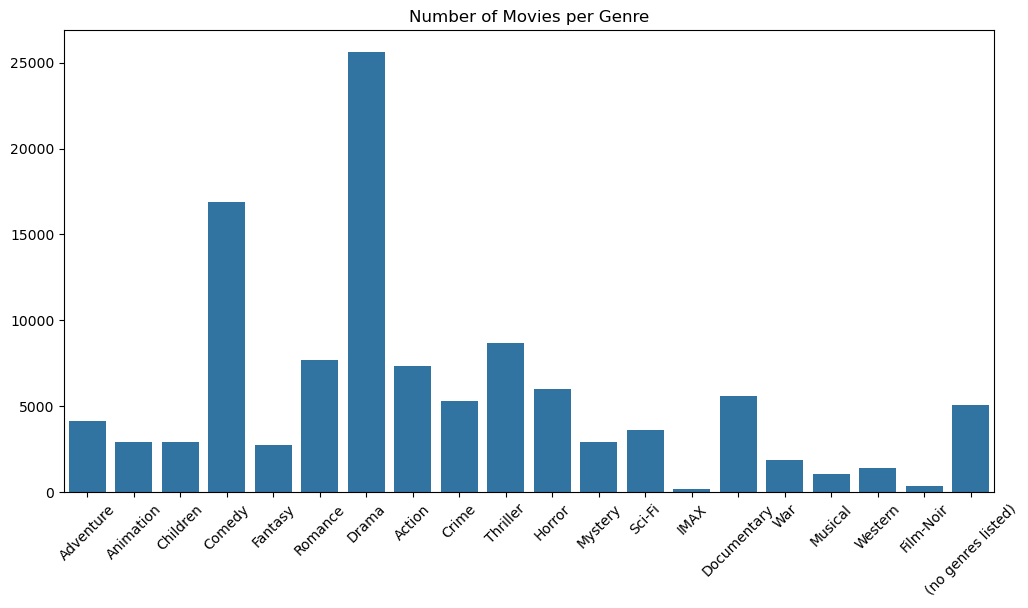

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

genre_counts = Counter([genre for genres in movies['genres'] for genre in genres])
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.title("Number of Movies per Genre")
plt.xticks(rotation=45)
plt.show()

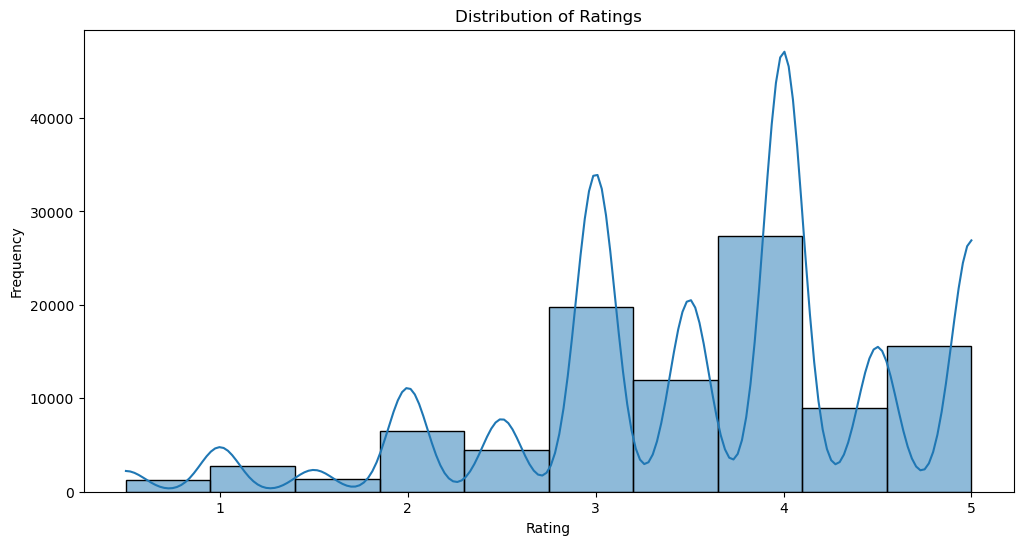

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

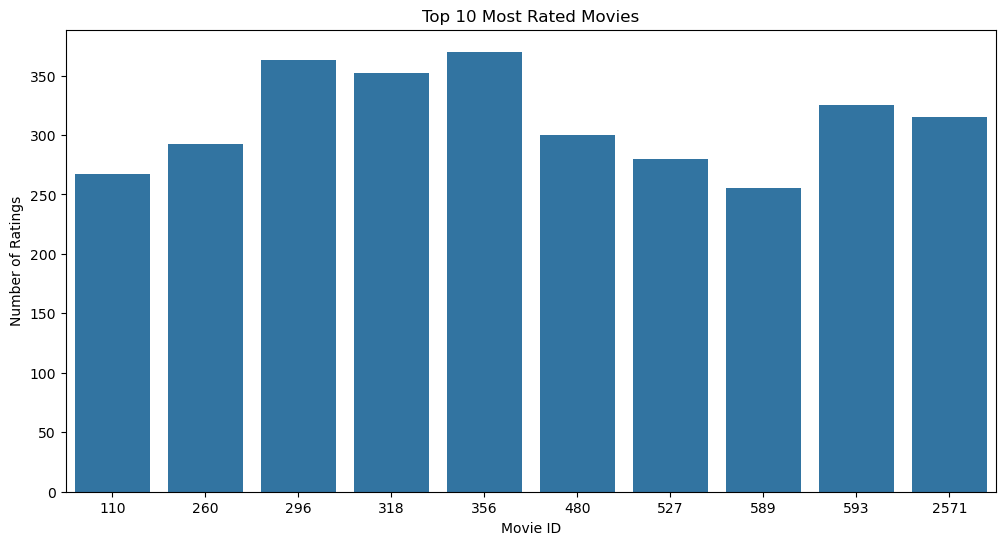

In [ ]:
movie_ratings_count = ratings['movieId'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=movie_ratings_count.index, y=movie_ratings_count.values)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Movie ID")
plt.ylabel("Number of Ratings")
plt.show()

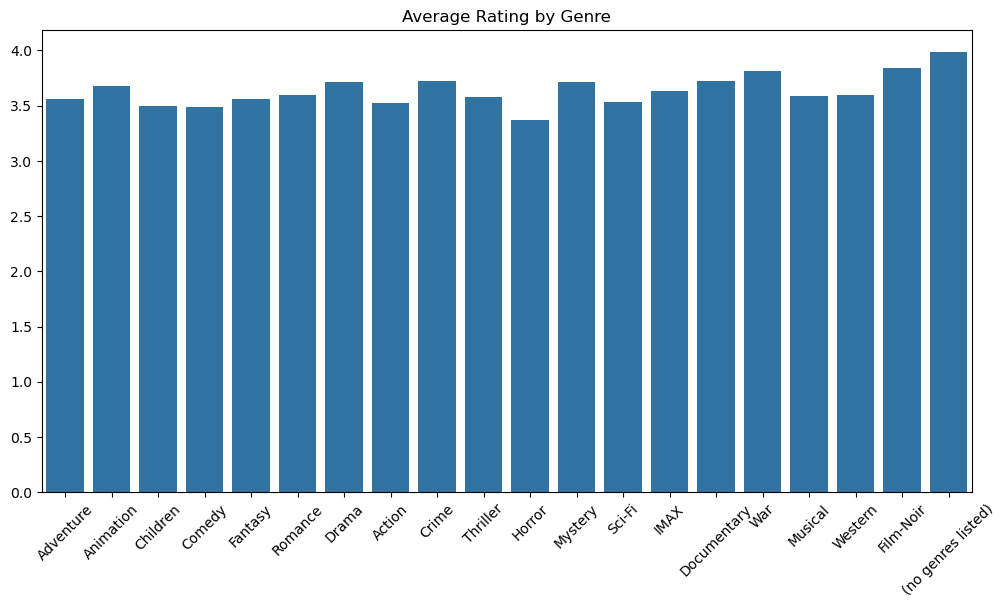

In [ ]:
genre_ratings = {genre: ratings[ratings['movieId'].isin(movies[movies['genres'].apply(lambda x: genre in x)]['movieId'])]['rating'].mean() for genre in genre_counts.keys()}
plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_ratings.keys()), y=list(genre_ratings.values()))
plt.title("Average Rating by Genre")
plt.xticks(rotation=45)
plt.show()

***

## Model Creation and Testing

### Collaborative Filtering using Singular Value Decomposition (SVD) and Cosine Similarity

#### Importing the required libraries and modules

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

#### Creating a user-item matrix for collaborative filtering

In [ ]:
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_movie_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,204692,204698,204704,205054,205072,205106,205413,205499,205557,206272
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Converting the user-item matrix to a sparse matrix

In [ ]:
sparse_matrix = csr_matrix(user_movie_matrix.values)

#### Matrix factorisation using SVD

In [ ]:
svd = TruncatedSVD(n_components = 50, random_state = 40)
matrix = svd.fit_transform(sparse_matrix)

#### Getting recommendations on the basis of cosine similarity

In [ ]:
def svd_recommend(user_id, n_recommendations=10):
    user_idx = user_id - 1
    similarity = cosine_similarity([matrix[user_idx]], matrix)[0]
    similar_users = similarity.argsort()[-n_recommendations:]

    weighted_ratings = {}
    for user in similar_users:
        for movie_id, rating in user_movie_matrix.iloc[user].items():
            if rating > 0:
                if movie_id not in weighted_ratings:
                    weighted_ratings[movie_id] = 0
                weighted_ratings[movie_id] += similarity[user] * rating

    recommended_movies = user_movie_matrix.columns[similar_users].tolist()
    return movies[movies['movieId'].isin(recommended_movies)]['title']

print("Recommendations for user 1:\n", svd_recommend(1))

Recommendations for user 1:
 0                                       Toy Story (1995)
55                        Kids of the Round Table (1995)
70                                      Fair Game (1995)
116                                  If Lucy Fell (1996)
359                                Lion King, The (1994)
381                                        S.F.W. (1994)
598               Candyman: Farewell to the Flesh (1995)
629                                        Girl 6 (1996)
698                           Of Love and Shadows (1994)
826    Story of Xinghua, The (Xinghua san yue tian) (...
Name: title, dtype: object


***

### Content-Based Filtering using Genres with Term Frequency - Inverse Document Frequency (TF-IDF)

#### Importing the required libraries and modules

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse as sp

#### Combining genres into a single string to use TF-IDF

In [ ]:
movies['genres'] = movies['genres'].apply(lambda x: ' '.join(x))

#### TF-IDF vectorisation and creating sparse matrix

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

#### Computing cosine similarity

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix, dense_output=False)

#### Getting recommendations on the basis of cosine similarity

In [ ]:
def content_based_recommend(movie_id, n_recommendations=10):
    similar_scores = cosine_sim[movie_id]
    similar_movies = similar_scores.toarray().flatten()
    similar_movies_index = similar_movies.argsort()[-n_recommendations-1:][::-1]
    recommended_movie_titles = movies.iloc[similar_movies_index]['title'].tolist()

    return recommended_movie_titles

recommended_movies = content_based_recommend(movie_id=2, n_recommendations=10)

print("Recommendations for movie 1:")
for idx, movie in enumerate(recommended_movies, 1):
    print(f"{idx}. {movie}")

Recommendations for movie 1:
1. My Best Friend's Girl (2008)
2. Brain Drain (2009)
3. Mr. Music (1950)
4. Carnival in Flanders (La kermesse héroïque) (1935)
5. There's Something About Mary (1998)
6. Kiki, Love to Love (2016)
7. Show Business (1944)
8. The Perfect Specimen (1937)
9. You Can't Take It with You (1938)
10. Tammy Tell Me True (1961)
11. Divorce of Lady X, The (1938)


***